### Initialization
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [113]:
import time
import json
import pprint
import config
import base64
import spotipy
import requests
import datetime
import seaborn as sns
import pandas as pd
from functools import lru_cache
from bs4 import BeautifulSoup
from urllib.parse import urlencode
from spotipy.oauth2 import SpotifyClientCredentials

import pandas as pd
import numpy as np
from plotly import express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

import pickle

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

pd.set_option('display.max_columns', None)

In [29]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.clientId,
                                                           client_secret= config.clientSecret))

In [30]:
def get_playlist_tracks(username, playlist_id):
    results = sp.user_playlist_tracks(username, playlist_id)
    tracks = results["items"]
    while results["next"]:
        results = sp.next(results)
        tracks.extend(results["items"])
    return tracks

#### Functions

In [34]:
# selective call to function
class dataProfiling:

    def moreInfo(self, data):    
        # more data info
        print(f"MORE DATA INFO :")
        print("-" * 109)

        print(f"Data shape : {data.shape}\n")

        # counts no. total values in the data
        print(f"No. of values in the dataset : {data.size:,}")

        # counts no. of rows
        print(f"Total rows in the dataset : {len(data):,}")

        # counts no. of columns
        print(f"Total columns in the dataset : {len(data.columns):,}")

        # counts no. of missing values
        print(f"\nTotal null values : {data.isnull().sum().sum():,}")

        # counts no. of duplicates
        countDuplicates = data.duplicated().sum()
        print(f"Total duplicated rows : {format(countDuplicates, ',')}")

        # compute missing/duplicates ratio
        print(f"\nRATIO OF MISSING AND DUPLICATED VALUES IN OUR DATA :")
        print("-" * 109)

        # ratio for missing values
        isnull_ratio = (data.isnull().sum().sum() / data.size) * 100

        # ratio for duplicated values
        dup_ratio = (countDuplicates / len(data)) * 100

        # return results
        print(f"\nPercentage of null values in the data : {round(isnull_ratio, 2)}%")
        print(f"Percentage of duplicates in the data : {round(dup_ratio, 2)}%")
        print("\n")

    def valueCounts(self, data):
        # count no. of values per column
        print(f"\nCOUNT VALUES FOR EACH COLUMN :")
        print("-" * 109)
        for column in data.columns:
            countValues = data[column].value_counts(dropna=False).to_frame()
            totalValues = data[column].count()
            print(f"VALUE_COUNTS for column '{column}' : {len(countValues)} rows, {totalValues} values in Total\n")
            display(countValues)
            print("-" * 109)

    def nullColumns(self, data):
        # displays no. of missing values per column
        print(f"\nTOTAL MISSING VALUES FOR EACH COLUMN :")
        display(data.isnull().sum().to_frame().rename(columns={0: "MISSING VALUES"}))
        print("\n")

    def nullGroupby(self, data, column):
        # displays no. of missing values per category
        print(f"\nTOTAL MISSING VALUES PER COLUMN FOR EACH UNIQUE VALUE :")        
        display(data.isna().groupby(data[column]).sum())

        print("\n")
    def visualizeNulls(self, data):
        # visualize missing values
        print(f"VISAULIZE MISSNG VALUES :")
        print("-" * 109)

        # method 1
        print("METHOD 1")
        sns.heatmap(data.isnull().T,
                    xticklabels=False,
                    cmap="viridis",
                    cbar_kws={"label": "Missing Values"})

        plt.tight_layout()
        plt.show()
        print("\n")

        # method 2
        print("METHOD 2")
        plt.imshow(data.isna(), aspect="auto", interpolation="nearest", cmap="gray")
        plt.xlabel("Column Number")
        plt.ylabel("Sample Number");
        print("\n")

    def nullFeature(self, data, column):
        # displays rows where missing values are found of a specific column 
        print(f"DISPLAYS ROWS WHERE MISSING VALUES ARE FOUND OF A SPECIFIC FEATURE:")
        display(data[data[column].isna()])
        print("\n")

    def nullData(self, data):
        # displays rows where missing values are found
        print(f"DISPLAYS ROWS WHERE MISSING VALUES ARE FOUND :")
        display(data[data.isnull().any(axis=1)])
        print("\n")

    def allStats(self, data):
        # overall descerptive analysis (nuemrical and categorical)
        print(f"FULL DATA DESCRIPTIVE STATISTICS :")
        print("-" * 109)
        display(data.describe(include="all"))
        print("\n")

    def descriptiveData(self, data):
        # do quick descriptive statistics
        print(f"QUICK DESCRIPTIVE ANALYSIS :")
        print("-" * 109)
        display(data.describe())
        print("\n")

    def nonNumericStats(self, data):
        # categorical statistics
        print(f"NON-NUMERICAL STATISTICS :")
        print("-" * 109)
        display(data.describe(exclude="number"))
        print("\n")

    def uniqueColumns(self, data):
        # view all unique values for each column
        print(f"UNIQUE VALUES FOR EACH COLUMN :")
        print("-" * 109)

        for column in data.columns:
            uniqueValues = data[column].unique()
            uniqueCount = data[column].nunique()
            print(f"UNIQUE VALUES for column '{column}' : {len(uniqueValues)} including NaN values, {uniqueCount} excluding Nan values\n")
            print(f"{uniqueValues}\n")
            print("-" * 109)

    def plotUniques(self, data):
        # for each numerical feature compute number of unique entries
        unique_values = data.select_dtypes(include="number").nunique().sort_values()

        # plot information with y-axis in log-scale
        unique_values.plot.bar(logy=False, title="No. of unique values per feature", figsize=(25,7))
        plt.xticks(rotation=0)
        plt.tight_layout()
        plt.show()

# instance of the dataProfiling class
profiler = dataProfiling()

## experimental : *ground zero*

In [5]:
# import spotipy
# from spotipy.oauth2 import SpotifyClientCredentials
# 
# lz_uri = 'spotify:artist:36QJpDe2go2KgaRleHCDTp'
# results = sp.artist_top_tracks(lz_uri)
# 
# for track in results['tracks'][:10]:
#     print('track    : ' + track['name'])
#     print('audio    : ' + track['preview_url'])
#     print('cover art: ' + track['album']['images'][0]['url'])
#     print()

In [6]:
# playlist_link = "https://open.spotify.com/playlist/37i9dQZEVXbNG2KDcFcKOF?si=1333723a6eff4b7f"
# playlist_URI = playlist_link.split("/")[-1].split("?")[0]
# track_uris = [x["track"]["uri"] for x in sp.playlist_tracks(playlist_URI)["items"]]

In [7]:
# # extracting tracks' uri from the playlist
# topGlobal_uris = [x["track"]["uri"] for x in sp.playlist_tracks(topGlobal)["items"]]
# pprint.pprint(topGlobal_uris)
# 
# # no. of tracks in the playlist
# print(len(topGlobal_uris))

In [8]:
# uri = 'spotify:artist:2WX2uTcsvV5OnS0inACecP'
# 
# results = sp.artist_albums(uri, album_type='album')
# albums = results['items']
# 
# while results['next']:
#     results = sp.next(results)
#     albums.extend(results['items'])
# 
# for album in albums:
#     print(album['name'])

In [9]:
# for song in sp.playlist_tracks(topGlobal)["items"]:
#     track_uri = song["track"]["uri"]
#     results = sp.search(q=track_uri, market="US")
#     pprint.pprint(results)

In [10]:
# playlistTracks = get_playlist_tracks("spotify", topGlobal)
# pprint.pprint(playlistTracks)

In [11]:
# j = sp.playlist_tracks(topGlobal)["items"]
# for song in j:
#     pprint.pprint(song)

In [12]:
# # hold track details
# track_details = []

# # get first page of playlist tracks
# results = sp.playlist_tracks(topGlobal)

# # While there are more pages (tracks) to be fetched
# while results:

#     # extract track info from the current page of the playlist
#     for song in results["items"]:
        
#         track_dict = {}

#         # TRACK
#         track_dict["track_uri"] = song["track"]["uri"]
#         track_dict["track_id"] = song["track"]["id"]
#         track_dict["track_name"] = song["track"]["name"]
#         track_dict["track_pop"] = song["track"]["popularity"]
#         track_dict["track_duration"] = song["track"]["duration_ms"]
#         track_dict["track_number"] = song["track"]["disc_number"]
#         track_dict["is_explicit"] = song["track"]["explicit"]

#         # ARTISTS
#         # list to hold information for all artists of the track
#         artist_ids = []
#         artist_names = []
#         artist_uris = []
#         artist_pops = []
#         artist_genres = []

#         for artist in song["track"]["artists"]:
#             artist_ids.append(artist["id"])
#             artist_names.append(artist["name"])
#             artist_uris.append(artist["uri"])
#             artist_info = sp.artist(artist["uri"])
#             artist_pops.append(artist_info["popularity"])
#             artist_genres.append(artist_info["genres"])

#         track_dict["artist_ids"] = artist_ids
#         track_dict["artist_names"] = artist_names
#         track_dict["artist_uris"] = artist_uris
#         track_dict["artist_pops"] = artist_pops
#         track_dict["artist_genres"] = artist_genres

#         # ALBUM
#         track_dict["album_name"] = song["track"]["album"]["name"]
#         track_dict["album_id"] = song["track"]["album"]["id"]
#         track_dict["album_type"] = song["track"]["album"]["album_type"]
#         track_dict["album_release"] = song["track"]["album"]["release_date"]
#         track_dict["album_totalTracks"] = song["track"]["album"]["total_tracks"]
#         track_dict["album_cover"] = song["track"]["album"]["images"][0]["url"]

#         # AUDIO FEATURES
#         audio_features = sp.audio_features(track_dict["track_id"])[0]  # get the first (and only) item
#         track_dict.update(audio_features)  # add the audio features to the track dictionary

#         # append the track_dict to the list
#         track_details.append(track_dict)

#     # get next page of tracks
#     results = sp.next(results)

# # convert the list of dictionaries to a DataFrame
# x = pd.DataFrame(track_details)
# x

In [13]:
# j = sp.playlist_tracks(topGlobal)["items"]
# for song in j:
#     pprint.pprint(song)

In [14]:
# for playlist_name, playlist_id in playlists.items():
#     print(f"Genres for playlist: {playlist_name}")
#     # Fetching playlist data
#     playlist = sp.playlist(playlist_id)
#     # Fetching tracks in the playlist
#     tracks = playlist['tracks']['items']
#     for track in tracks:
#         if track['track']['artists']:
#             # Fetching artist data for each track
#             artist = sp.artist(track['track']['artists'][0]['uri'])
#             # The genres associated with the artist
#             genres = artist['genres']
#             print(f"Track: {track['track']['name']}, Artist: {track['track']['artists'][0]['name']}, Genres: {genres}")
#         else:
#             print(f"Track: {track['track']['name']} has no associated artist.")
#     print("\n")

In [15]:
# topGlobal = "37i9dQZEVXbNG2KDcFcKOF"
# playlist = sp.user_playlist_tracks("spotify", topGlobal)
# pprint.pprint(playlist)
  
# print(list(playlist.keys())) # Let's look at items and total:
# print("Total number of songs in the playlist: ",playlist["total"]) #  Let's check items:

In [16]:
# topGlobal = "37i9dQZEVXbNG2KDcFcKOF"
# playlist = sp.user_playlist_tracks("spotify", topGlobal)
# pprint.pprint(playlist)
  
# print(list(playlist.keys())) # Let's look at items and total:
# print("Total number of songs in the playlist: ",playlist["total"]) #  Let's check items:

In [17]:
# pprint.pprint(sp.search(q="O Stella"))

In [18]:
# # Artist's URI
# artist_uri = "5YGY8feqx7naU7z4HrwZM6"

# # Fetching artist data
# artist = sp.artist(artist_uri)

# # The genres associated with the artist
# genres = artist['genres']

# print(genres)

In [19]:
# topGlobal = "37i9dQZEVXbNG2KDcFcKOF"
# playlist = sp.user_playlist_tracks("spotify", topGlobal)
# # pprint.pprint(playlist)

# # list to hold track details
# track_details = []

# # first page of playlist tracks
# results = sp.playlist_tracks(topGlobal)

# # While there are more pages (tracks) to be fetched
# while results:

#     # extract track info from the current page of the playlist
#     for song in results["items"]:
        
#         track_dict = {}

#         # TRACK
#         track_dict["track_uri"] = song["track"]["uri"]
#         track_dict["track_id"] = song["track"]["id"]
#         track_dict["track_name"] = song["track"]["name"]
#         track_dict["track_pop"] = song["track"]["popularity"]
#         track_dict["track_duration"] = song["track"]["duration_ms"]
#         track_dict["track_number"] = song["track"]["disc_number"]
#         track_dict["is_explicit"] = song["track"]["explicit"]

#         # ARTIST
#         artist_uri = song["track"]["artists"][0]["uri"]
#         artist_info = sp.artist(artist_uri)
#         track_dict["artist_id"] = song["track"]["artists"][0]["id"]
#         track_dict["artist_name"] = song["track"]["artists"][0]["name"]
#         track_dict["artist_pop"] = artist_info["popularity"]
#         track_dict["artist_genres"] = artist_info["genres"]

#         # ALBUM
#         track_dict["album_name"] = song["track"]["album"]["name"]
#         track_dict["album_id"] = song["track"]["album"]["id"]
#         track_dict["album_type"] = song["track"]["album"]["album_type"]
#         track_dict["album_release"] = song["track"]["album"]["release_date"]
#         track_dict["album_totalTracks"] = song["track"]["album"]["total_tracks"]
#         track_dict["album_cover"] = song["track"]["album"]["images"][0]["url"]

#         # AUDIO FEATURES
#         audio_features = sp.audio_features(track_dict["track_id"])[0]  # get the first (and only) item
#         track_dict.update(audio_features)  # add the audio features to the track dictionary

#         # append the track_dict to the list
#         track_details.append(track_dict)

#     # get next page of tracks
#     results = sp.next(results)

# # convert the list of dictionaries to a DataFrame
# spotipyData = pd.DataFrame(track_details)
# spotipyData

In [20]:
# spotipyData["artist_genres"].loc[spotipyData["artist_name"] == "Yandel"]

In [21]:
# @`lru_cache`(maxsize=1000)
# def get_artist_info(artist_uri):
#     return sp.artist(artist_uri)

# @lru_cache(maxsize=1000)
# def get_audio_features(track_id):
#     return sp.audio_features(track_id)[0]

# # maximum number of retries for the API call
# max_retries = 5

# # list to hold track details
# track_details = []

# # iterate over each playlist in the dictionary
# for playlist_name, playlist_id in playlists.items():

#     for i in range(max_retries):
#         try:
#             # first page of playlist tracks
#             results = sp.playlist_tracks(playlist_id)

#             # While there are more pages (tracks) to be fetched
#             while results:

#                 # extract track info from the current page of the playlist
#                 for song in results["items"]:
                    
#                     track_dict = {}

#                     # add the playlist name
#                     track_dict["playlist_name"] = playlist_name

#                     # TRACK
#                     track_dict["track_uri"] = song["track"]["uri"]
#                     track_dict["track_id"] = song["track"]["id"]
#                     track_dict["track_name"] = song["track"]["name"]
#                     track_dict["track_pop"] = song["track"]["popularity"]
#                     track_dict["track_duration"] = song["track"]["duration_ms"]
#                     track_dict["track_number"] = song["track"]["disc_number"]
#                     track_dict["is_explicit"] = song["track"]["explicit"]

#                     # ARTIST
#                     artist_uri = song["track"]["artists"][0]["uri"]
#                     track_dict["artist_id"] = song["track"]["artists"][0]["id"]
#                     track_dict["artist_name"] = song["track"]["artists"][0]["name"]
                    
#                     artist_info = get_artist_info(artist_uri)
#                     track_dict["artist_pop"] = artist_info["popularity"]
#                     track_dict["artist_genres"] = artist_info["genres"]

#                     # ALBUM
#                     track_dict["album_name"] = song["track"]["album"]["name"]
#                     track_dict["album_id"] = song["track"]["album"]["id"]
#                     track_dict["album_type"] = song["track"]["album"]["album_type"]
#                     track_dict["album_release"] = song["track"]["album"]["release_date"]
#                     track_dict["album_totalTracks"] = song["track"]["album"]["total_tracks"]
#                     track_dict["album_cover"] = song["track"]["album"]["images"][0]["url"]

#                     # AUDIO FEATURES
#                     audio_features = get_audio_features(track_dict["track_id"])  # get the first (and only) item
#                     track_dict.update(audio_features)  # add the audio features to the track dictionary

#                     # append the track_dict to the list
#                     track_details.append(track_dict)

#                 # get next page of tracks
#                 results = sp.next(results)

#             # break loop if the API call was successful
#             break

#         except spotipy.exceptions.SpotifyException as e:
#             # if exception is a rate limiting error (error 429), wait and retry
#             if e.http_status == 429:
#                 print("Rate limit exceeded. Waiting...")
#                 time.sleep(int(e.headers.get('Retry-After', 10)))
#             else:
#                 # if different kind of error, we will handle it differently, let's see..
#                 # or re-raise the exception if it's not something our script can recover from
#                 raise e

# # convert the list of dictionaries to a DataFrame
# spotipyData = pd.DataFrame(track_details)
# spotipyData

In [22]:
# @lru_cache(maxsize=1000)
# def get_artist_info(artist_uri):
#     return sp.artist(artist_uri)

# @lru_cache(maxsize=1000)
# def get_audio_features(track_id):
#     return sp.audio_features(track_id)[0]

# # maximum number of retries for the API call
# max_retries = 5

# # list to hold track details
# track_details = []

# # iterate over each playlist in the dictionary
# for playlist_name, playlist_id in playlists.items():

#     for i in range(max_retries):
#         try:
#             # first page of playlist tracks
#             results = sp.playlist_tracks(playlist_id)

#             # While there are more pages (tracks) to be fetched
#             while results:

#                 # extract track info from the current page of the playlist
#                 for song in results["items"]:
                    
#                     track_dict = {}

#                     # add the playlist name
#                     track_dict["playlist_name"] = playlist_name

#                     # TRACK
#                     track_dict["track_uri"] = song["track"]["uri"]
#                     track_dict["track_id"] = song["track"]["id"]
#                     track_dict["track_name"] = song["track"]["name"]
#                     track_dict["track_pop"] = song["track"]["popularity"]
#                     track_dict["track_duration"] = song["track"]["duration_ms"]
#                     track_dict["track_number"] = song["track"]["disc_number"]
#                     track_dict["is_explicit"] = song["track"]["explicit"]

#                     # ARTIST
#                     artist_uri = song["track"]["artists"][0]["uri"]
#                     track_dict["artist_id"] = song["track"]["artists"][0]["id"]
#                     track_dict["artist_name"] = song["track"]["artists"][0]["name"]
                    
#                     artist_info = get_artist_info(artist_uri)
#                     track_dict["artist_pop"] = artist_info["popularity"]
#                     track_dict["artist_genres"] = artist_info["genres"]

#                     # ALBUM
#                     track_dict["album_name"] = song["track"]["album"]["name"]
#                     track_dict["album_id"] = song["track"]["album"]["id"]
#                     track_dict["album_type"] = song["track"]["album"]["album_type"]
#                     track_dict["album_release"] = song["track"]["album"]["release_date"]
#                     track_dict["album_totalTracks"] = song["track"]["album"]["total_tracks"]
#                     track_dict["album_cover"] = song["track"]["album"]["images"][0]["url"]

#                     # AUDIO FEATURES
#                     audio_features = get_audio_features(track_dict["track_id"])  # get the first (and only) item
#                     track_dict.update(audio_features)  # add the audio features to the track dictionary

#                     # append the track_dict to the list
#                     track_details.append(track_dict)

#                 # get next page of tracks
#                 results = sp.next(results)

#             # break loop if the API call was successful
#             break

#         except spotipy.exceptions.SpotifyException as e:
#             # if exception is a rate limiting error (error 429), wait and retry
#             if e.http_status == 429:
#                 print("Rate limit exceeded. Waiting...")
#                 time.sleep(int(e.headers.get('Retry-After', 10)))
#             else:
#                 # if different kind of error, we will handle it differently, let's see..
#                 # or re-raise the exception if it's not something our script can recover from
#                 raise e

# # convert the list of dictionaries to a DataFrame
# spotipyData = pd.DataFrame(track_details)
# spotipyData

In [23]:
# # list to hold track details
# track_details = []

# # iterate over each playlist in the dictionary
# for playlist_name, playlist_id in playlists.items():

#     # first page of playlist tracks
#     results = sp.playlist_tracks(playlist_id)

#     # While there are more pages (tracks) to be fetched
#     while results:

#         # extract track info from the current page of the playlist
#         for song in results["items"]:
            
#             track_dict = {}

#             # add the playlist name
#             track_dict["playlist_name"] = playlist_name

#             # TRACK
#             track_dict["trackURI"] = song["track"]["uri"]
#             track_dict["trackID"] = song["track"]["id"]
#             track_dict["trackName"] = song["track"]["name"]
#             track_dict["trackPopularity"] = song["track"]["popularity"]
#             track_dict["trackDuration"] = song["track"]["duration_ms"]
#             track_dict["trackNumber"] = song["track"]["disc_number"]
#             track_dict["isExplicit"] = song["track"]["explicit"]

#             # ARTIST
#             artist_uri = song["track"]["artists"][0]["uri"]
#             track_dict["artistID"] = song["track"]["artists"][0]["id"]
#             track_dict["artistName"] = song["track"]["artists"][0]["name"]
#             artist_info = sp.artist(artist_uri)
#             track_dict["asrtistPopularity"] = artist_info["popularity"]
#             track_dict["artistGenre"] = artist_info["genres"]

#             # ALBUM
#             track_dict["albumName"] = song["track"]["album"]["name"]
#             track_dict["albumID"] = song["track"]["album"]["id"]
#             track_dict["albumType"] = song["track"]["album"]["album_type"]
#             track_dict["releaseDate"] = song["track"]["album"]["release_date"]
#             track_dict["album_numberTracks"] = song["track"]["album"]["total_tracks"]
#             track_dict["albumCover"] = song["track"]["album"]["images"][0]["url"]

#             # AUDIO FEATURES
#             audio_features = sp.audio_features(track_dict["trackID"])[0]  # get the first (and only) item
#             track_dict.update(audio_features)  # add the audio features to the track dictionary

#             # append the track_dict to the list
#             track_details.append(track_dict)

#         # get next page of tracks
#         results = sp.next(results)

# # convert the list of dictionaries to a DataFrame
# spotipyData = pd.DataFrame(track_details)
# spotipyData

In [24]:
# # list to hold track details
# track_details = []

# # iterate over each playlist in the dictionary
# for playlist_name, playlist_id in playlists.items():

#     # first page of playlist tracks
#     results = sp.playlist_tracks(playlist_id)

#     # While there are more pages (tracks) to be fetched
#     while results:

#         # extract track info from the current page of the playlist
#         for song in results["items"]:
            
#             track_dict = {}

#             # add the playlist name
#             track_dict["playlist_name"] = playlist_name

#             # TRACK
#             track_dict["trackURI"] = song["track"]["uri"]

#             # ARTIST
#             artist_uri = song["track"]["artists"][0]["uri"]
#             if isinstance(artist_uri, str):  # check if artist_uri is a string
#                 track_dict["artist_id"] = song["track"]["artists"][0]["id"]
#                 track_dict["artist_name"] = song["track"]["artists"][0]["name"]

#                 artist_info = get_artist_info(artist_uri)  # call the function if artist_uri is a string
                
#                 track_dict["artist_pop"] = artist_info["popularity"]
#                 track_dict["artist_genres"] = artist_info["genres"]
#             else:
#                 print(f"Unexpected type for artist_uri: {type(artist_uri)}")

#             # append the track_dict to the list
#             track_details.append(track_dict)

#         # get next page of tracks
#         results = sp.next(results)

# # convert the list of dictionaries to a DataFrame
# spotipyData = pd.DataFrame(track_details)
# spotipyData

## data hunting

In [42]:
# playlists = {
#     "Who's That Girl": "0cLPcrlTcogy15QDfsQMWH",
#     "Eurovision 2023": "37i9dQZF1DWVCKO3xAlT1Q",
#     "Soft 50s": "37i9dQZF1DWXcg95telZlE",
#     "50s Party": "37i9dQZF1DWSwFS0Z6E1ep",
#     "All Out 50s": "37i9dQZF1DWSV3Tk4GO2fq",
#     "All Out 60s": "37i9dQZF1DXaKIA8E7WcJj",
#     "Années 60": "37i9dQZF1DX7Uol5MpckMS",
#     "All Out 70s": "37i9dQZF1DWTJ7xPn4vNaz",
#     "Best of Rock 1970s": "37i9dQZF1DXe9Gx5fVy1RT",
#     "Top Hits of 1970s": "37i9dQZF1DWXQyLTHGuTIz",
#     "Top Global 2023 - Weekly Charts": "37i9dQZEVXbNG2KDcFcKOF",
#     "All Out 2000s": "37i9dQZF1DX4o1oenSJRJd",
#     "Gold School (Hip Hop)": "37i9dQZF1DWVA1Gq4XHa6U",
#     "I Love My 90's Hip Hop": "37i9dQZF1DX186v583rmzp",
#     "Van life": "37i9dQZF1DX2ogDiL6nZJr",
#     "Good Vibes": "37i9dQZF1DWYBO1MoTDhZI",
#     "On the Road": "37i9dQZF1DX1S89tRXh2OS",
#     "Electro Chill": "37i9dQZF1DX9ND1QF5hZNF",
#     "Summer Tubes": "37i9dQZF1DWVf5yEjHHamn",
#     "Beach Vibes": "37i9dQZF1DX83I5je4W4rP",
#     "Summer Love": "37i9dQZF1DWY0BsMpCzERZ",
#     "Pop 2010": "37i9dQZF1DX8E06AbSENEw",
#     "Internet Rewind": "37i9dQZF1DWSPMbB1kcXmo",
#     "Equal K-Pop": "37i9dQZF1DX6Cy4Vr7Hu2y",
#     "Door Knockers - Classics from women in Hip hop": "37i9dQZF1DX9iGsUcr0Bpa",
#     "Baroque Classics": "37i9dQZF1DWXjj6kdiviS0",
#     "Romantische Klassik": "37i9dQZF1DWXQD9LUA72yg",
#     "Classical Essentials": "37i9dQZF1DWWEJlAGA9gs0",
#     "Opera Classics": "37i9dQZF1DWVfS4Cdd3PNf",
#     "Jazz Classics": "37i9dQZF1DXbITWG1ZJKYt",
#     "20+20+20+20 (80s)": "4Cw5GB3gHYT4UtRLxiafxt",
#     "Grrrrls": "2ZalQGM5fnEGFEAWFxnUP0",
#     "This Is Ratatat": "37i9dQZF1DZ06evO30oJa0",
#     "Top Throwbacks 2022": "37i9dQZF1DXdpy4ZQQMZKm",
#     "This Is Suede": "37i9dQZF1DZ06evO42t81I",
#     "Alternative 90s": "37i9dQZF1DXaLI8a395lse",
#     "Britpop etc": "37i9dQZF1DXaVgr4Tx5kRF",
#     "Légendes du Rock": "37i9dQZF1DWXTHBOfJ8aI7",
#     "I Love My 90s R&B": "37i9dQZF1DX6VDO8a6cQME",
#     "Flashback (Soul & Funk)": "37i9dQZF1DWXncK9DGeLh7",
#     "Sad Soul": "37i9dQZF1DXchlyaSeZp0q",
#     "Pop Chef": "37i9dQZF1DWXGPruVsfHKD",
#     "Funk & Soul Classics": "37i9dQZF1DWWvhKV4FBciw",
#     "Love Ballads": "37i9dQZF1DWYMvTygsLWlG",
#     "Sad Songs": "37i9dQZF1DX7qK8ma5wgG1",
#     "Indie Love Songs": "37i9dQZF1DWZIQpJDqCc10",
#     "Iconic Soundtracks": "37i9dQZF1DX1tz6EDao8it",
#     "Radio Ratatat": "37i9dQZF1E4qOvEr6iONpb",
#     "Radio Rangleklods": "37i9dQZF1E4oIf3a2eTRNV",
#     "Radio Björk": "37i9dQZF1E4Dy7CFyohSGG",
#     "Radio John Adams": "37i9dQZF1E4AbPpZmpoNtA",
#     "Radio Mark Morrison": "37i9dQZF1E4BjguqgbGnPZ",
#     "Radio U2": "37i9dQZF1E4lGTiNNgejAf",
#     "Radio Tash Sultana": "37i9dQZF1E4yvrFcE1Ebu2",
#     "Radio France Joli": "37i9dQZF1E4vvvLV0VoMm7",
#     "Radio Darondo": "37i9dQZF1E4nP8olYLWc7X",
#     "Radio Rodriguez": "37i9dQZF1E4oc4Q8MNZjh6",
#     "Radio Nina Simone": "37i9dQZF1E4nhi0B8j7Dp8",
#     "Radio Beyoncé": "37i9dQZF1E4B0yOyj0F53g",
#     "Radio Billie Eilish": "37i9dQZF1E4oee5QSbfqLN",
#     "Radio Honne": "37i9dQZF1E4uE7XrQEJTw4",
#     "Radio Nat King Cole": "37i9dQZF1E4vSoikuLfYSw",
#     "Radio Shigeru Umebayashi": "37i9dQZF1E4z4GftZr48PU",
#     "Radio Yo-Yo Ma": "37i9dQZF1E4jPjmMkFX0XY",
#     "Radio John Williams": "37i9dQZF1E4tbkEjnlwI4U",
#     "Radio Alicia Keys": "37i9dQZF1E4myiUG0z7BzX",
#     "Radio Patti Smith": "37i9dQZF1E4nIsD70hZdhC",
#     "Radio SIA": "37i9dQZF1E4oH2NG2UyvvJ",
#     "Radio Radiohead": "37i9dQZF1E4EgTnU7Hvt0A",
#     "Radio Taylor Swift": "37i9dQZF1E4AfEUiirXPyP",
#     "Radio Ariana Grande": "37i9dQZF1E4xstu1WxmJS4"}

In [43]:
# @lru_cache(maxsize=1000)
# def get_artist_info(artist_uri):
#     return sp.artist(artist_uri)

# @lru_cache(maxsize=1000)
# def get_audio_features(track_id):
#     return sp.audio_features(track_id)[0]

# # maximum number of retries for the API call
# max_retries = 5

# # list to hold track details
# track_details = []

# # iterate over each playlist in the dictionary
# for playlist_name, playlist_id in playlists.items():

#     for i in range(max_retries):
#         try:
#             # first page of playlist tracks
#             results = sp.playlist_tracks(playlist_id)

#             # While there are more pages (tracks) to be fetched
#             while results:

#                 # extract track info from the current page of the playlist
#                 for song in results["items"]:
                    
#                     track_dict = {}

#                     # add the playlist name
#                     track_dict["fromPlaylist"] = playlist_name

#                     # TRACK
#                     # track_dict["trackURI"] = song["track"]["uri"]
#                     # track_dict["trackID"] = song["track"]["id"]
#                     track_dict["trackName"] = song["track"]["name"]
#                     track_dict["trackPopularity"] = song["track"]["popularity"]
#                     # track_dict["trackDuration"] = song["track"]["duration_ms"]
#                     track_dict["trackNumber"] = song["track"]["disc_number"]
#                     track_dict["isExplicit"] = song["track"]["explicit"]

#                     # ARTIST
#                     artist_uri = song["track"]["artists"][0]["uri"]
#                     if isinstance(artist_uri, str):  # check if artist_uri is a string
#                         track_dict["artistID"] = song["track"]["artists"][0]["id"]
#                         track_dict["artistName"] = song["track"]["artists"][0]["name"]
        
#                         artist_info = get_artist_info(artist_uri)  # call the function if artist_uri is a string
                        
#                         track_dict["artistPop"] = artist_info["popularity"]
#                         track_dict["artistGenre"] = artist_info["genres"][0] if artist_info["genres"] else None

#                     else:
#                         print(f"Unexpected type for artist_uri: {type(artist_uri)}")

#                     # ALBUM
#                     track_dict["albumName"] = song["track"]["album"]["name"]
#                     track_dict["albumID"] = song["track"]["album"]["id"]
#                     track_dict["albumType"] = song["track"]["album"]["album_type"]
#                     release_date = song["track"]["album"]["release_date"]
#                     if release_date is not None:
#                         track_dict["releaseDate"] = pd.to_datetime(release_date).year
#                     else:
#                         track_dict["releaseDate"] = None
#                     track_dict["album_nTracks"] = song["track"]["album"].get("total_tracks", None)
#                     album_images = song["track"]["album"]["images"]
#                     if album_images:
#                         track_dict["albumCover"] = album_images[0]["url"]
#                     else:
#                         track_dict["albumCover"] = None

#                     # AUDIO FEATURES
#                     track_id = song["track"]["id"] # track_dict["trackID"]
#                     if track_id is not None:
#                         audio_features = get_audio_features(track_id)
#                         track_dict.update(audio_features)
#                     else:
#                         print(f"Unexpected type for trackID: {type(track_id)}")

#                     # append the track_dict to the list
#                     track_details.append(track_dict)

#                 # get next page of tracks
#                 results = sp.next(results)

#             # break loop if the API call was successful
#             break

#         except spotipy.exceptions.SpotifyException as e:
#             # if exception is a rate limiting error (error 429), wait and retry
#             if e.http_status == 429:
#                 print("Rate limit exceeded. Waiting...")
#                 time.sleep(int(e.headers.get("Retry-After", 10)))
#             else:
#                 # if different kind of error, we will handle it differently, let's see..
#                 # or re-raise the exception if it's not something our script can recover from
#                 raise e

# # convert the list of dictionaries to a DataFrame
# spotipyData = pd.DataFrame(track_details)
# spotipyData

,fromPlaylist,trackName,trackPopularity,trackNumber,isExplicit,artistID,artistName,artistPop,artistGenre,albumName,albumID,albumType,releaseDate,album_nTracks,albumCover,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Who's That Girl,Violet,64,1,False,5SHQUMAmEK5KmuSb0aDvsn,Hole,60,alternative rock,Live Through This,2Rwf2nPYZQ9aIe4QXACTC7,album,1994,12,https://i.scdn.co/image/ab67616d0000b273be245e...,0.287,0.780,7,-6.493,1,0.0469,0.04900,0.000037,0.1840,0.3830,167.278,audio_features,6CHENx8iqzMwavTIz8s0gm,spotify:track:6CHENx8iqzMwavTIz8s0gm,https://api.spotify.com/v1/tracks/6CHENx8iqzMw...,https://api.spotify.com/v1/audio-analysis/6CHE...,204933,4
1,Who's That Girl,Miss World,54,1,False,5SHQUMAmEK5KmuSb0aDvsn,Hole,60,alternative rock,Live Through This,2Rwf2nPYZQ9aIe4QXACTC7,album,1994,12,https://i.scdn.co/image/ab67616d0000b273be245e...,0.331,0.722,7,-8.461,1,0.0408,0.00204,0.000053,0.2560,0.3490,125.575,audio_features,3yMFBuIdPBdJkkzaPBDjKY,spotify:track:3yMFBuIdPBdJkkzaPBDjKY,https://api.spotify.com/v1/tracks/3yMFBuIdPBdJ...,https://api.spotify.com/v1/audio-analysis/3yMF...,180067,4
2,Who's That Girl,Doll Parts,61,1,False,5SHQUMAmEK5KmuSb0aDvsn,Hole,60,alternative rock,Live Through This,2Rwf2nPYZQ9aIe4QXACTC7,album,1994,12,https://i.scdn.co/image/ab67616d0000b273be245e...,0.245,0.542,7,-7.159,1,0.0324,0.14700,0.000004,0.1020,0.3650,204.824,audio_features,49t1GWE6ZiEoBgN92oMDdM,spotify:track:49t1GWE6ZiEoBgN92oMDdM,https://api.spotify.com/v1/tracks/49t1GWE6ZiEo...,https://api.spotify.com/v1/audio-analysis/49t1...,211960,4
3,Who's That Girl,Rock Star,47,1,True,5SHQUMAmEK5KmuSb0aDvsn,Hole,60,alternative rock,Live Through This,2Rwf2nPYZQ9aIe4QXACTC7,album,1994,12,https://i.scdn.co/image/ab67616d0000b273be245e...,0.308,0.868,4,-6.440,1,0.1440,0.00514,0.000045,0.2700,0.2500,125.782,audio_features,72xpgWWuEyLWFFTIKnrAbZ,spotify:track:72xpgWWuEyLWFFTIKnrAbZ,https://api.spotify.com/v1/tracks/72xpgWWuEyLW...,https://api.spotify.com/v1/audio-analysis/72xp...,162200,4
4,Who's That Girl,Lark,0,1,False,6mKqFxGMS5TGDZI3XkT5Rt,Angel Olsen,55,alternative americana,All Mirrors,0RedX0LZkGUFoRwFntAaI0,album,2019,11,https://i.scdn.co/image/ab67616d0000b2732b31fc...,0.447,0.560,7,-8.360,1,0.0316,0.00311,0.099100,0.2200,0.0422,98.986,audio_features,13rEyddPoVpxXWWv2aTjqo,spotify:track:13rEyddPoVpxXWWv2aTjqo,https://api.spotify.com/v1/tracks/13rEyddPoVpx...,https://api.spotify.com/v1/audio-analysis/13rE...,378827,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5500,Radio Ariana Grande,everytime,77,1,True,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,89,pop,Sweetener,3tx8gQqWbGwqIGZHqDNrGe,album,2018,15,https://i.scdn.co/image/ab67616d0000b273c3af0c...,0.710,0.614,10,-6.757,0,0.0431,0.18600,0.000000,0.0974,0.6580,148.152,audio_features,0WdR2AyLW1Drd3OUdwezM0,spotify:track:0WdR2AyLW1Drd3OUdwezM0,https://api.spotify.com/v1/tracks/0WdR2AyLW1Dr...,https://api.spotify.com/v1/audio-analysis/0WdR...,172107,4
5501,Radio Ariana Grande,Umbrella,73,1,False,5pKCCKE2ajJHZ9KAiaK11H,Rihanna,90,barbadian pop,Good Girl Gone Bad,4OXnPSBtZo8PBFiTOfuumP,album,2007,12,https://i.scdn.co/image/ab67616d0000b273b9ff0a...,0.583,0.829,1,-4.603,1,0.1340,0.00864,0.000000,0.0426,0.5750,174.028,audio_features,2yPoXCs7BSIUrucMdK5PzV,spotify:track:2yPoXCs7BSIUrucMdK5PzV,https://api.spotify.com/v1/tracks/2yPoXCs7BSIU...,https://api.spotify.com/v1/audio-analysis/2yPo...,275987,4
5502,Radio Ariana Grande,I Don’t Wanna Live Forever (Fifty Shades Darker),81,1,False,5ZsFI1h6hIdQRw2ti0hz81,ZAYN,76,pop,reputation Stadium Tour Surprise Song Playlist,1MPAXuTVL2Ej5x0JHiSPq8,album,2017,46,https://i.scdn.co/image/ab67616d0000b27363d77f...,0.731,0.445,0,-8.418,1,0.0533,0.05860,0.000020,0.1400,0.1060,117.970,audio_features,55n9yjI6qqXh5F2mYvUc2y,spotify:track:55n9yjI6qqXh5F2mYvUc2y,https://api.spot

## data profiling

### to work on later

In [ ]:
# indexes_to_delete = [501, 1287, 1410, 832, 676, 992, 1007, 1041, 771, 775, 1243, 798, 962, 977, 934, 753, 779, 1219, 611, 567, 765, 758, 1502, 928, 1023, 1025, 582, 769, 1245,
#                      822, 1038, 1479, 980, 881, 974, 1009, 1477, 981, 542, 1480, 935, 1206, 1037]
# data = data.drop(indexes_to_delete).copy()

In [ ]:
# data[["fromPlaylist", "trackID", "trackName", "releaseDate"]].loc[data.duplicated(["trackID", "trackName"], keep=False)].sort_values(by="trackID").head(50)

In [ ]:
# data[data.duplicated(["trackID", "trackName"], keep=False)].count()

### as for now..

```python
# use these methods to analyze the data
profiler.moreInfo(data)
profiler.valueCounts(data)
profiler.nullColumns(data)
profiler.nullGroupby(data, column)
profiler.visualizeNulls(data)
profiler.nullFeature(data, column)
profiler.nullData(data)
profiler.descriptiveData(data)
profiler.nonNumericStats(data)
profiler.uniqueColumns(data)
profiler.plotUniques(data)
```

In [45]:
# spotipyData["fromPlaylist"].nunique()

71

In [55]:
# databackup = spotipyData.copy()
# # databackup.to_csv("databackup.csv")

In [44]:
# profiler.nullColumns(spotipyData)


TOTAL MISSING VALUES FOR EACH COLUMN :


,MISSING VALUES
fromPlaylist,0
trackName,0
trackPopularity,0
trackNumber,0
isExplicit,0
artistID,0
artistName,0
artistPop,0
artistGenre,213
albumName,0


In [ ]:
# dataBackup[(databackup["fromPlaylist"] == "Last Century 50s-80s") & (databackup["id"].isnull())]

In [ ]:
# profiler.nullData(spotipyData)

In [48]:
# profiler.moreInfo(spotipyData)

MORE DATA INFO :
-------------------------------------------------------------------------------------------------------------
Data shape : (5505, 33)

No. of values in the dataset : 181,665
Total rows in the dataset : 5,505
Total columns in the dataset : 33

Total null values : 213
Total duplicated rows : 1

RATIO OF MISSING AND DUPLICATED VALUES IN OUR DATA :
-------------------------------------------------------------------------------------------------------------

Percentage of null values in the data : 0.12%
Percentage of duplicates in the data : 0.02%




In [50]:
# # spotipyData = spotipyData.dropna(subset=["danceability"])
# spotipyData = spotipyData.drop_duplicates(subset="id")

In [51]:
# profiler.nonNumericStats(spotipyData)

NON-NUMERICAL STATISTICS :
-------------------------------------------------------------------------------------------------------------


,fromPlaylist,trackName,isExplicit,artistID,artistName,artistGenre,albumName,albumID,albumType,albumCover,type,id,uri,track_href,analysis_url
count,4709,4709,4709,4709,4709,4506,4709,4709,4709,4709,4709,4709,4709,4709,4709
unique,71,4532,2,2142,2141,531,3562,3620,3,3620,1,4709,4709,4709,4709
top,Who's That Girl,Woman,False,7w29UYBi0qsHi5RTcv3lmA,Björk,classical,Cuz I Love You (Super Deluxe),2KJjOBX280F3hZZE1xO33O,album,https://i.scdn.co/image/ab67616d0000b2737bebcd...,audio_features,6CHENx8iqzMwavTIz8s0gm,spotify:track:6CHENx8iqzMwavTIz8s0gm,https://api.spotify.com/v1/tracks/6CHENx8iqzMw...,https://api.spotify.com/v1/audio-analysis/6CHE...
freq,467,4,4280,59,59,222,9,8,3826,8,4709,1,1,1,1


In [52]:
# spotipyData.to_csv("spotipyData.csv")

## data preparation

In [127]:
# QUEST 1
# Load the Pandas data frame songs of the audio features (at least 1000 songs as different as possible)
data = pd.read_csv("spotipyData.csv").iloc[:, 1:]
noGenre = data.copy()

data.head()

,fromPlaylist,trackName,trackPopularity,trackNumber,isExplicit,artistID,artistName,artistPop,artistGenre,albumName,albumID,albumType,releaseDate,album_nTracks,albumCover,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Who's That Girl,Violet,64,1,False,5SHQUMAmEK5KmuSb0aDvsn,Hole,60,alternative rock,Live Through This,2Rwf2nPYZQ9aIe4QXACTC7,album,1994,12,https://i.scdn.co/image/ab67616d0000b273be245e...,0.287,0.780,7,-6.493,1,0.0469,0.04900,0.000037,0.184,0.3830,167.278,audio_features,6CHENx8iqzMwavTIz8s0gm,spotify:track:6CHENx8iqzMwavTIz8s0gm,https://api.spotify.com/v1/tracks/6CHENx8iqzMw...,https://api.spotify.com/v1/audio-analysis/6CHE...,204933,4
1,Who's That Girl,Miss World,54,1,False,5SHQUMAmEK5KmuSb0aDvsn,Hole,60,alternative rock,Live Through This,2Rwf2nPYZQ9aIe4QXACTC7,album,1994,12,https://i.scdn.co/image/ab67616d0000b273be245e...,0.331,0.722,7,-8.461,1,0.0408,0.00204,0.000053,0.256,0.3490,125.575,audio_features,3yMFBuIdPBdJkkzaPBDjKY,spotify:track:3yMFBuIdPBdJkkzaPBDjKY,https://api.spotify.com/v1/tracks/3yMFBuIdPBdJ...,https://api.spotify.com/v1/audio-analysis/3yMF...,180067,4
2,Who's That Girl,Doll Parts,61,1,False,5SHQUMAmEK5KmuSb0aDvsn,Hole,60,alternative rock,Live Through This,2Rwf2nPYZQ9aIe4QXACTC7,album,1994,12,https://i.scdn.co/image/ab67616d0000b273be245e...,0.245,0.542,7,-7.159,1,0.0324,0.14700,0.000004,0.102,0.3650,204.824,audio_features,49t1GWE6ZiEoBgN92oMDdM,spotify:track:49t1GWE6ZiEoBgN92oMDdM,https://api.spotify.com/v1/tracks/49t1GWE6ZiEo...,https://api.spotify.com/v1/audio-analysis/49t1...,211960,4
3,Who's That Girl,Rock Star,47,1,True,5SHQUMAmEK5KmuSb0aDvsn,Hole,60,alternative rock,Live Through This,2Rwf2nPYZQ9aIe4QXACTC7,album,1994,12,https://i.scdn.co/image/ab67616d0000b273be245e...,0.308,0.868,4,-6.440,1,0.1440,0.00514,0.000045,0.270,0.2500,125.782,audio_features,72xpgWWuEyLWFFTIKnrAbZ,spotify:track:72xpgWWuEyLWFFTIKnrAbZ,https://api.spotify.com/v1/tracks/72xpgWWuEyLW...,https://api.spotify.com/v1/audio-analysis/72xp...,162200,4
4,Who's That Girl,Lark,0,1,False,6mKqFxGMS5TGDZI3XkT5Rt,Angel Olsen,55,alternative americana,All Mirrors,0RedX0LZkGUFoRwFntAaI0,album,2019,11,https://i.scdn.co/image/ab67616d0000b2732b31fc...,0.447,0.560,7,-8.360,1,0.0316,0.00311,0.099100,0.220,0.0422,98.986,audio_features,13rEyddPoVpxXWWv2aTjqo,spotify:track:13rEyddPoVpxXWWv2aTjqo,https://api.spotify.com/v1/tracks/13rEyddPoVpx...,https://api.spotify.com/v1/audio-analysis/13rE...,378827,4


In [128]:
# QUEST 2
# Standardize the data using Standardscaler
toNormalize = ["trackPopularity",
                  "isExplicit",
                  "artistPop",
                  "releaseDate",
                  "danceability",
                  "energy",
                  "key",
                  "loudness",
                  "mode",
                  "speechiness",
                  "acousticness",
                  "instrumentalness",
                  "liveness",
                  "valence",
                  "tempo",
                  "duration_ms",
                  "time_signature"]

scaler = StandardScaler()
X_normalized = scaler.fit_transform(noGenre[["trackPopularity",
                  "isExplicit",
                  "artistPop",
                  "releaseDate",
                  "danceability",
                  "energy",
                  "key",
                  "loudness",
                  "mode",
                  "speechiness",
                  "acousticness",
                  "instrumentalness",
                  "liveness",
                  "valence",
                  "tempo",
                  "duration_ms",
                  "time_signature"]])

# QUEST 3
# Save the scaler for future use on the new user input song, using Pickle
with open("X_normalized.pickle", "wb") as f:
    pickle.dump(X_normalized, f)

# store into a dataframe
normalizedFeatures = pd.DataFrame(X_normalized, columns=toNormalize)

# add identifier
normalizedFeatures["identifier"] = normalizedFeatures.index
normalizedFeatures.index = normalizedFeatures["identifier"]
del normalizedFeatures["identifier"]
normalizedFeatures.head()

,trackPopularity,isExplicit,artistPop,releaseDate,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
identifier,,,,,,,,,,,,,,,,,
0,0.373336,-0.316597,-0.074351,-0.293910,-1.362864,0.991102,0.488268,0.643888,0.78097,-0.307340,-1.000934,-0.524031,0.109947,-0.344239,1.768678,-0.388548,0.279106
1,-0.131268,-0.316597,-0.074351,-0.293910,-1.136253,0.770125,0.488268,0.330638,0.78097,-0.396622,-1.132584,-0.523977,0.648254,-0.467999,0.332304,-0.638007,0.279106
2,0.221955,-0.316597,-0.074351,-0.293910,-1.579174,0.084333,0.488268,0.537880,0.78097,-0.519568,-0.726196,-0.524138,-0.503124,-0.409759,3.061873,-0.318052,0.279106
3,-0.484490,3.158590,-0.074351,-0.293910,-1.254709,1.326379,-0.349042,0.652324,0.78097,1.113853,-1.123893,-0.524004,0.752925,-0.828360,0.339434,-0.817252,0.279106
4,-2.856125,-0.316597,-0.388303,0.954621,-0.538826,0.152912,0.488268,0.346715,0.78097,-0.531277,-1.129584,-0.201427,0.379101,-1.584754,-0.583499,1.355984,0.279106


In [129]:
# NORMALIZATION
# Let's check whether the normalized data has a mean of zero and a standard deviation of one.
np.mean(normalizedFeatures), np.std(normalizedFeatures)

(6.088870082713062e-17,
 trackPopularity     1.0
 isExplicit          1.0
 artistPop           1.0
 releaseDate         1.0
 danceability        1.0
 energy              1.0
 key                 1.0
 loudness            1.0
 mode                1.0
 speechiness         1.0
 acousticness        1.0
 instrumentalness    1.0
 liveness            1.0
 valence             1.0
 tempo               1.0
 duration_ms         1.0
 time_signature      1.0
 dtype: float64)

In [130]:
noGenre["identifier"] = noGenre.index
noGenre.index = noGenre["identifier"]
del noGenre["identifier"]

noGenre["identifier"] = noGenre.index
noGenre.reset_index(drop=True, inplace=True)
noGenre.head()

,fromPlaylist,trackName,trackPopularity,trackNumber,isExplicit,artistID,artistName,artistPop,artistGenre,albumName,albumID,albumType,releaseDate,album_nTracks,albumCover,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,identifier
0,Who's That Girl,Violet,64,1,False,5SHQUMAmEK5KmuSb0aDvsn,Hole,60,alternative rock,Live Through This,2Rwf2nPYZQ9aIe4QXACTC7,album,1994,12,https://i.scdn.co/image/ab67616d0000b273be245e...,0.287,0.780,7,-6.493,1,0.0469,0.04900,0.000037,0.184,0.3830,167.278,audio_features,6CHENx8iqzMwavTIz8s0gm,spotify:track:6CHENx8iqzMwavTIz8s0gm,https://api.spotify.com/v1/tracks/6CHENx8iqzMw...,https://api.spotify.com/v1/audio-analysis/6CHE...,204933,4,0
1,Who's That Girl,Miss World,54,1,False,5SHQUMAmEK5KmuSb0aDvsn,Hole,60,alternative rock,Live Through This,2Rwf2nPYZQ9aIe4QXACTC7,album,1994,12,https://i.scdn.co/image/ab67616d0000b273be245e...,0.331,0.722,7,-8.461,1,0.0408,0.00204,0.000053,0.256,0.3490,125.575,audio_features,3yMFBuIdPBdJkkzaPBDjKY,spotify:track:3yMFBuIdPBdJkkzaPBDjKY,https://api.spotify.com/v1/tracks/3yMFBuIdPBdJ...,https://api.spotify.com/v1/audio-analysis/3yMF...,180067,4,1
2,Who's That Girl,Doll Parts,61,1,False,5SHQUMAmEK5KmuSb0aDvsn,Hole,60,alternative rock,Live Through This,2Rwf2nPYZQ9aIe4QXACTC7,album,1994,12,https://i.scdn.co/image/ab67616d0000b273be245e...,0.245,0.542,7,-7.159,1,0.0324,0.14700,0.000004,0.102,0.3650,204.824,audio_features,49t1GWE6ZiEoBgN92oMDdM,spotify:track:49t1GWE6ZiEoBgN92oMDdM,https://api.spotify.com/v1/tracks/49t1GWE6ZiEo...,https://api.spotify.com/v1/audio-analysis/49t1...,211960,4,2
3,Who's That Girl,Rock Star,47,1,True,5SHQUMAmEK5KmuSb0aDvsn,Hole,60,alternative rock,Live Through This,2Rwf2nPYZQ9aIe4QXACTC7,album,1994,12,https://i.scdn.co/image/ab67616d0000b273be245e...,0.308,0.868,4,-6.440,1,0.1440,0.00514,0.000045,0.270,0.2500,125.782,audio_features,72xpgWWuEyLWFFTIKnrAbZ,spotify:track:72xpgWWuEyLWFFTIKnrAbZ,https://api.spotify.com/v1/tracks/72xpgWWuEyLW...,https://api.spotify.com/v1/audio-analysis/72xp...,162200,4,3
4,Who's That Girl,Lark,0,1,False,6mKqFxGMS5TGDZI3XkT5Rt,Angel Olsen,55,alternative americana,All Mirrors,0RedX0LZkGUFoRwFntAaI0,album,2019,11,https://i.scdn.co/image/ab67616d0000b2732b31fc...,0.447,0.560,7,-8.360,1,0.0316,0.00311,0.099100,0.220,0.0422,98.986,audio_features,13rEyddPoVpxXWWv2aTjqo,spotify:track:13rEyddPoVpxXWWv2aTjqo,https://api.spotify.com/v1/tracks/13rEyddPoVpx...,https://api.spotify.com/v1/audio-analysis/13rE...,378827,4,4


In [131]:
# QUEST 4 + 5 + 7 + 8
# Adjust k means cluster
# + Select the number of clusters k
# + Use the model with the best k,
# to assign each observation in your data frame to its cluster number,
# using model.predict (add cluster columns to the pandas data frame)
# + Save the model with the best k as your final model using pickle

# reducing isn't necesarry here since we already have standardized units

# clustering par K-means
kmeans = KMeans(n_clusters=30, n_init=10)
kmeans.fit(normalizedFeatures)

with open("kmeans.pickle", "wb") as f:
    pickle.dump(kmeans, f)

# group sorting
clusters = np.argsort(kmeans.labels_)

# show observations and groups
clustered = pd.DataFrame(normalizedFeatures.index[clusters], kmeans.labels_[clusters])
display(clustered.head())

# add cluster column
clustered["kmeans_cluster"] = clustered.index
clustered.reset_index(drop=True, inplace=True)
display(clustered.head())

# no. of clusters
display(clustered["kmeans_cluster"].unique())

# join noGenre dataset with clustered dataset
labeled = pd.merge(clustered, noGenre, on = "identifier")
display(labeled.head())

# keep cool columns for viewing and get essential track info
trackInfo = labeled[["id", "trackName", "artistName", "artistGenre", "isExplicit", "albumName", "album_nTracks", "releaseDate", "duration_ms", "fromPlaylist", "trackPopularity", "artistPop", "albumCover", "uri", "kmeans_cluster"]]
display(trackInfo.head())

# dataset to pickle
with open("trackInfo.pickle", "wb") as f:
    pickle.dump(trackInfo, f)

,identifier
0,2909
0,3395
0,152
0,3788
0,2908


,identifier,kmeans_cluster
0,2909,0
1,3395,0
2,152,0
3,3788,0
4,2908,0


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], dtype=int32)

,identifier,kmeans_cluster,fromPlaylist,trackName,trackPopularity,trackNumber,isExplicit,artistID,artistName,artistPop,artistGenre,albumName,albumID,albumType,releaseDate,album_nTracks,albumCover,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,2909,0,This Is Ratatat,Crips,34,1,False,57dN52uHvrHOxijzpIgu3E,Ratatat,66,indietronica,Ratatat,7nqSnoxmIdcfxAJBxl9AIh,album,2004,11,https://i.scdn.co/image/ab67616d0000b27327c578...,0.756,0.454,1,-7.590,0,0.0545,0.121000,0.893,0.0978,0.874,102.978,audio_features,6h7YEGr14L7ZiqtiVCJaQq,spotify:track:6h7YEGr14L7ZiqtiVCJaQq,https://api.spotify.com/v1/tracks/6h7YEGr14L7Z...,https://api.spotify.com/v1/audio-analysis/6h7Y...,227867,4
1,3395,0,Funk & Soul Classics,Cissy Strut,63,1,False,2JRvXPGWiINrnJljNJhG5s,The Meters,52,funk,The Meters,1Nt14TE6bKZGzJrROip36y,album,1969,12,https://i.scdn.co/image/ab67616d0000b273a93a02...,0.507,0.763,0,-12.732,1,0.0945,0.172000,0.886,0.3240,0.708,176.193,audio_features,0WSlOSMLJWoWUpWci9nnRb,spotify:track:0WSlOSMLJWoWUpWci9nnRb,https://api.spotify.com/v1/tracks/0WSlOSMLJWoW...,https://api.spotify.com/v1/audio-analysis/0WSl...,186853,4
2,152,0,Who's That Girl,Swimsuit Issue,24,1,False,5UqTO8smerMvxHYA5xsXb6,Sonic Youth,58,alternative rock,Dirty,7oNRvhXwhNCfHEUGER5EhG,album,1992,15,https://i.scdn.co/image/ab67616d0000b273bc89a9...,0.230,0.897,11,-8.987,0,0.1220,0.000559,0.769,0.1970,0.120,171.298,audio_features,6kV9NxzVRU8AuLnTrM6ux0,spotify:track:6kV9NxzVRU8AuLnTrM6ux0,https://api.spotify.com/v1/tracks/6kV9NxzVRU8A...,https://api.spotify.com/v1/audio-analysis/6kV9...,178040,4
3,3788,0,Radio Rangleklods,Inden Du Falder I Søvn,36,1,False,0m0udc0jvvBGmwdieH5su5,Mikael Simpson,30,danish electropop,Slaar Skaar,2kBWlsMnWmiOm5SGVYmjI4,album,2009,11,https://i.scdn.co/image/ab67616d0000b2730029ef...,0.541,0.673,9,-10.091,0,0.0689,0.052400,0.708,0.1190,0.287,107.068,audio_features,5JrHNiKP3qykdEV0grcmOS,spotify:track:5JrHNiKP3qykdEV0grcmOS,https://api.spotify.com/v1/tracks/5JrHNiKP3qyk...,https://api.spotify.com/v1/audio-analysis/5JrH...,176067,4
4,2908,0,This Is Ratatat,Shempi,34,1,False,57dN52uHvrHOxijzpIgu3E,Ratatat,66,indietronica,LP3,0hnAUFi96menN8c3hJ6F45,album,2008,13,https://i.scdn.co/image/ab67616d0000b27373b350...,0.611,0.829,10,-5.059,1,0.0465,0.005300,0.911,0.3380,0.507,123.448,audio_features,71tnN2ja5I8rwScmQgqH4f,spotify:track:71tnN2ja5I8rwScmQgqH4f,https://api.spotify.com/v1/tracks/71tnN2ja5I8r...,https://api.spotify.com/v1/audio-analysis/71tn...,237440,4


,id,trackName,artistName,artistGenre,isExplicit,albumName,album_nTracks,releaseDate,duration_ms,fromPlaylist,trackPopularity,artistPop,albumCover,uri,kmeans_cluster
0,6h7YEGr14L7ZiqtiVCJaQq,Crips,Ratatat,indietronica,False,Ratatat,11,2004,227867,This Is Ratatat,34,66,https://i.scdn.co/image/ab67616d0000b27327c578...,spotify:track:6h7YEGr14L7ZiqtiVCJaQq,0
1,0WSlOSMLJWoWUpWci9nnRb,Cissy Strut,The Meters,funk,False,The Meters,12,1969,186853,Funk & Soul Classics,63,52,https://i.scdn.co/image/ab67616d0000b273a93a02...,spotify:track:0WSlOSMLJWoWUpWci9nnRb,0
2,6kV9NxzVRU8AuLnTrM6ux0,Swimsuit Issue,Sonic Youth,alternative rock,False,Dirty,15,1992,178040,Who's That Girl,24,58,https://i.scdn.co/image/ab67616d0000b273bc89a9...,spotify:track:6kV9NxzVRU8AuLnTrM6ux0,0
3,5JrHNiKP3qykdEV0grcmOS,Inden Du Falder I Søvn,Mikael Simpson,danish electropop,False,Slaar Skaar,11,2009,176067,Radio Rangleklods,36,30,https://i.scdn.co/image/ab67616d0000b2730029ef...,spotify:track:5JrHNiKP3qykdEV0grcmOS,0
4,71tnN2ja5I8rwScmQgqH4f,Shempi,Ratatat,indietronica,False,LP3,13,2008,237440,This Is Ratatat,34,66,https://i.scdn.co/image/ab67616d0000b27373b350...,spotify:track:71tnN2ja5I8rwScmQgqH4f,0


Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 

Training a K-Means model with 21 clusters! 

Training a K-Means model with 22 clusters! 

Training a K-Means model with 23 clusters! 

Training a K-Means model with 24 clusters! 

Training a K-Means model with 25 clusters! 

Training a K-Means model with 26 clusters! 

Training a K-Me

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

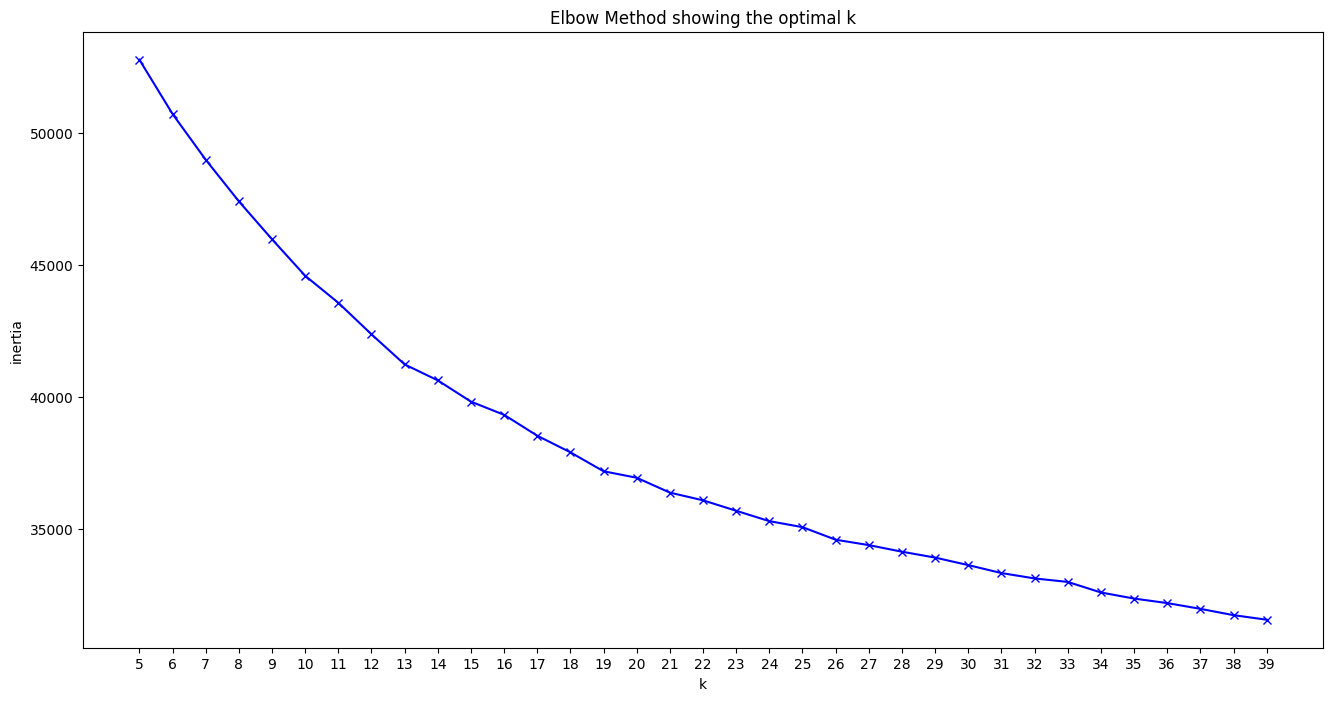

In [132]:
# QUEST 6
# Build the elbow graph to find the best k
K = range(5, 40) #range of the clusters
inertia = []

for k in K: #for every data in set build a inertia
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(normalizedFeatures)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0)) #changing the scale
plt.title('Elbow Method showing the optimal k') 

In [140]:
trackInfo[trackInfo["kmeans_cluster"] == 8]

,id,trackName,artistName,artistGenre,isExplicit,albumName,album_nTracks,releaseDate,duration_ms,fromPlaylist,trackPopularity,artistPop,albumCover,uri,kmeans_cluster
1530,08sEEy8n3kkCDBjZdYZ4GV,Ancestress,Björk,art pop,False,Fossora,13,2022,437914,Who's That Girl,39,63,https://i.scdn.co/image/ab67616d0000b273961d27...,spotify:track:08sEEy8n3kkCDBjZdYZ4GV,8
1531,2Y67qsABsPKMrvCxPCzL6r,We Go Down Together (with Khalid),Dove Cameron,pop,False,We Go Down Together (with Khalid),1,2023,184963,Love Ballads,75,72,https://i.scdn.co/image/ab67616d0000b27301c4d0...,spotify:track:2Y67qsABsPKMrvCxPCzL6r,8
1532,5fjFfw4mbNjcZuyT3dPKoV,Drinking,bôa,NaN,False,Twilight,14,2010,252613,Radio Radiohead,48,63,https://i.scdn.co/image/ab67616d0000b2739e030b...,spotify:track:5fjFfw4mbNjcZuyT3dPKoV,8
1533,534d5ANGf0pWmCe0KNTD6F,Ovule,Björk,art pop,False,Fossora,13,2022,218155,Who's That Girl,40,63,https://i.scdn.co/image/ab67616d0000b273961d27...,spotify:track:534d5ANGf0pWmCe0KNTD6F,8
1534,1duGF26RKaTntfsJ0cTkzj,Serenade To A Soul Sister - Remastered,Horace Silver,bebop,False,Serenade To A Soul Sister,6,2004,379000,Jazz Classics,41,45,https://i.scdn.co/image/ab67616d0000b273fd4740...,spotify:track:1duGF26RKaTntfsJ0cTkzj,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1628,58HvfVOeJY7lUuCqF0m3ly,MIDDLE OF THE NIGHT,Elley Duhé,alt z,False,MIDDLE OF THE NIGHT,1,2020,184448,Internet Rewind,87,77,https://i.scdn.co/image/ab67616d0000b27353a2e1...,spotify:track:58HvfVOeJY7lUuCqF0m3ly,8
1629,0mD1a7haZKdX9I0oPywrMb,Air on a G String,Johann Sebastian Bach,baroque,False,Classic,16,2020,289640,Baroque Classics,55,77,https://i.scdn.co/image/ab67616d0000b273574875...,spotify:track:0mD1a7haZKdX9I0oPywrMb,8
1630,0815caqt2Lytro5EIzMufT,You And Me,Lifehouse,neo mellow,False,Lifehouse,12,2005,195493,Love Ballads,76,64,https://i.scdn.co/image/ab67616d0000b273a35dae...,spotify:track:0815caqt2Lytro5EIzMufT,8
1631,4AFsRbaLKRWo3dDtjDFA2V,Me and Your Mama,Childish Gambino,atl hip hop,False,"""Awaken, My Love!""",11,2016,379227,Top Throwbacks 2022,84,79,https://i.scdn.co/image/ab67616d0000b273758271...,spotify:track:4AFsRbaLKRWo3dDtjDFA2V,8


In [134]:
from IPython.display import IFrame

def play_song(track_id):
    return IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media")

play_song("64MHnMvyOiNJU9tmUOBjeV")

## recommender